# Imports

## Generic

In [134]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from datetime import datetime
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import random as rand

## Sklearn 

In [135]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import fbeta_score, make_scorer, f1_score
from sklearn.pipeline import Pipeline
import sklearn.preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from xgboost import XGBRegressor

# Import data

For this analysis, we will use the original, full dataset. <br> This dataset has ~ 14k and even though separation between categories is not as clear (some foods are processed and preparations include ingredients from different categories), it is fit for our purpose as we will use it to build a model trying to predict calories
of food based on their properties.

In [136]:
food_data = pd.read_excel('data/MyFoodData Nutrition Facts SpreadSheet Release 1.4.xlsx')
#food_data = pd.read_excel('data/MyFoodData Nutrition Facts Redux.xlsx')

In [137]:
food_data.head(3)

,ID,Name,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",Magnesium (mg),"Vitamin A, IU (IU)","Vitamin A, RAE (mcg)",Vitamin C (mg),Vitamin B-12 (mcg),Vitamin D (mcg),Vitamin E (Alpha-Tocopherol) (mg),Added Sugar (g),Net-Carbs (g),Water (g),Omega 3s (mg),Omega 6s (mg),PRAL score,Trans Fatty Acids (g),Soluble Fiber (g),Insoluble Fiber (g),Sucrose (g),Glucose (Dextrose) (g),Fructose (g),Lactose (g),Maltose (g),Galactose (g),Starch (g),Total sugar alcohols (g),"Phosphorus, P (mg)",Sodium (mg),"Zinc, Zn (mg)","Copper, Cu (mg)",Manganese (mg),"Selenium, Se (mcg)","Fluoride, F (mcg)",Molybdenum (mcg),Chlorine (mg),Thiamin (B1) (mg),Riboflavin (B2) (mg),Niacin (B3) (mg),Pantothenic acid (B5) (mg),Vitamin B6 (mg),Biotin (B7) (mcg),Folate (B9) (mcg),Folic acid (mcg),Food Folate (mcg),Folate DFE (mcg),Choline (mg),Betaine (mg),Retinol (mcg),"Carotene, beta (mcg)","Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),Vitamin D2 (ergocalciferol) (mcg),Vitamin D3 (cholecalciferol) (mcg),Vitamin D (IU) (IU),Vitamin K (mcg),Dihydrophylloquinone (mcg),Menaquinone-4 (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)","18:3 n-3 c,c,c (ALA) (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Tryptophan (mg),Threonine (mg),Isoleucine (mg),Leucine (mg),Lysine (mg),Methionine (mg),Cystine (mg),Phenylalanine (mg),Tyrosine (mg),Valine (mg),Arginine (mg),Histidine (mg),Alanine (mg),Aspartic acid (mg),Glutamic acid (mg),Glycine (mg),Proline (mg),Serine (mg),Hydroxyproline (mg),Alcohol (g),Caffeine (mg),Theobromine (mg),Serving Weight 1 (g),Serving Description 1 (g),Serving Weight 2 (g),Serving Description 2 (g),Serving Weight 3 (g),Serving Description 3 (g),Serving Weight 4 (g),Serving Description 4 (g),Serving Weight 5 (g),Serving Description 5 (g),Serving Weight 6 (g),Serving Description 6 (g),Serving Weight 7 (g),Serving Description 7 (g),Serving Weight 8 (g),Serving Description 8 (g),Serving Weight 9 (g),Serving Description 9 (g),200 Calorie Weight (g)
0,167512,Pillsbury Golden Layer Buttermilk Biscuits Art...,Baked Foods,307.0,13.24,5.88,41.18,5.88,1.2,0.0,2.941,NaN,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.98,35.50,NaN,NaN,NaN,4.412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,1 serving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.147
1,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,0.0,3.250,28.0,1.93,NaN,NaN,1.0,0.0,0.1,NaN,NaN,NaN,NaN,52.02,27.86,NaN,NaN,NaN,4.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1 serving 1 roll with icing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.606
2,167514,Kraft Foods Shake N Bake Original Recipe Coati...,Baked Foods,377.0,3.70,6.10,79.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.80,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,1 serving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.050


# Data Preparation

## Removing columns

Following the EDA part, we remove irrelevant columns

Let's remove fields related to servings

In [138]:
serving_cols = food_data.columns[food_data.columns.str.contains('Serving')]

In [139]:
food_data.drop(serving_cols,axis=1,inplace=True)

We also remove the ID and 200 calorie weight (g) fields

In [140]:
food_data.drop(['ID','200 Calorie Weight (g)'],axis=1, inplace=True)

In [141]:
food_data.columns

Index(['Name', 'Food Group', 'Calories', 'Fat (g)', 'Protein (g)',
       'Carbohydrate (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)',
       'Saturated Fats (g)', 'Calcium (mg)', 'Iron, Fe (mg)',
       'Potassium, K (mg)', 'Magnesium (mg)', 'Vitamin A, IU (IU)',
       'Vitamin A, RAE (mcg)', 'Vitamin C (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin D (mcg)', 'Vitamin E (Alpha-Tocopherol) (mg)',
       'Added Sugar (g)', 'Net-Carbs (g)', 'Water (g)', 'Omega 3s (mg)',
       'Omega 6s (mg)', 'PRAL score', 'Trans Fatty Acids (g)',
       'Soluble Fiber (g)', 'Insoluble Fiber (g)', 'Sucrose (g)',
       'Glucose (Dextrose) (g)', 'Fructose (g)', 'Lactose (g)', 'Maltose (g)',
       'Galactose (g)', 'Starch (g)', 'Total sugar alcohols (g)',
       'Phosphorus, P (mg)', 'Sodium (mg)', 'Zinc, Zn (mg)', 'Copper, Cu (mg)',
       'Manganese (mg)', 'Selenium, Se (mcg)', 'Fluoride, F (mcg)',
       'Molybdenum (mcg)', 'Chlorine (mg)', 'Thiamin (B1) (mg)',
       'Riboflavin (B2) (mg)', 'Nia

## Dealing with NaNs

Let's remove records with no Food Group (128)

In [142]:
food_data = food_data.loc[~food_data['Food Group'].isna()].reset_index(drop=True)

For the purpose of the analysis, we can replace NaNs with zeros, assuming that missing values indicate that there is no such
substance in the food

In [143]:
food_data.replace(np.nan, 0, inplace=True)

In [144]:
food_data.isna().sum()

Name                   0
Food Group             0
Calories               0
Fat (g)                0
Protein (g)            0
                      ..
Serine (mg)            0
Hydroxyproline (mg)    0
Alcohol (g)            0
Caffeine (mg)          0
Theobromine (mg)       0
Length: 97, dtype: int64

In [145]:
food_data['Food Group'].value_counts()

Meats                      3192
Vegetables                 2282
Baked Foods                 939
Fish                        774
Prepared Meals              763
Fast Foods                  694
Beverages                   607
Baby Foods                  544
Soups and Sauces            532
Sweets                      503
Fruits                      456
Beans and Lentils           451
Breakfast Cereals           376
Dairy and Egg Products      368
Snacks                      291
Dairy and Egg Products      274
Fats and Oils               242
Grains and Pasta            237
Nuts and Seeds              171
American Indian             165
Restaurant Foods            112
Spices and Herbs             63
Name: Food Group, dtype: int64

## Fix Column Names

As seen during the EDA, the 'Dairy and Egg Products' column has white spaces, we will remove them to make it one single column

In [146]:
food_data['Food Group'] = food_data['Food Group'].str.strip()

In [147]:
food_data['Food Group'].value_counts()

Meats                     3192
Vegetables                2282
Baked Foods                939
Fish                       774
Prepared Meals             763
Fast Foods                 694
Dairy and Egg Products     642
Beverages                  607
Baby Foods                 544
Soups and Sauces           532
Sweets                     503
Fruits                     456
Beans and Lentils          451
Breakfast Cereals          376
Snacks                     291
Fats and Oils              242
Grains and Pasta           237
Nuts and Seeds             171
American Indian            165
Restaurant Foods           112
Spices and Herbs            63
Name: Food Group, dtype: int64

In [148]:
food_data.shape

(14036, 97)

# Modeling

In [149]:
feature_cols = ['Food Group', 'Fat (g)', 'Protein (g)',
       'Carbohydrate (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)',
       'Saturated Fats (g)', 'Calcium (mg)', 'Iron, Fe (mg)',
       'Potassium, K (mg)', 'Magnesium (mg)', 'Vitamin A, IU (IU)',
       'Vitamin A, RAE (mcg)', 'Vitamin C (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin D (mcg)', 'Vitamin E (Alpha-Tocopherol) (mg)',
       'Added Sugar (g)', 'Net-Carbs (g)', 'Water (g)', 'Omega 3s (mg)',
       'Omega 6s (mg)', 'PRAL score', 'Trans Fatty Acids (g)',
       'Soluble Fiber (g)', 'Insoluble Fiber (g)', 'Sucrose (g)',
       'Glucose (Dextrose) (g)', 'Fructose (g)', 'Lactose (g)', 'Maltose (g)',
       'Galactose (g)', 'Starch (g)', 'Total sugar alcohols (g)',
       'Phosphorus, P (mg)', 'Sodium (mg)', 'Zinc, Zn (mg)', 'Copper, Cu (mg)',
       'Manganese (mg)', 'Selenium, Se (mcg)', 'Fluoride, F (mcg)',
       'Molybdenum (mcg)', 'Chlorine (mg)', 'Thiamin (B1) (mg)',
       'Riboflavin (B2) (mg)', 'Niacin (B3) (mg)',
       'Pantothenic acid (B5) (mg)', 'Vitamin B6 (mg)', 'Biotin (B7) (mcg)',
       'Folate (B9) (mcg)', 'Folic acid (mcg)', 'Food Folate (mcg)',
       'Folate DFE (mcg)', 'Choline (mg)', 'Betaine (mg)', 'Retinol (mcg)',
       'Carotene, beta (mcg)', 'Carotene, alpha (mcg)', 'Lycopene (mcg)',
       'Lutein + Zeaxanthin (mcg)', 'Vitamin D2 (ergocalciferol) (mcg)',
       'Vitamin D3 (cholecalciferol) (mcg)', 'Vitamin D (IU) (IU)',
       'Vitamin K (mcg)', 'Dihydrophylloquinone (mcg)', 'Menaquinone-4 (mcg)',
       'Fatty acids, total monounsaturated (mg)',
       'Fatty acids, total polyunsaturated (mg)', '18:3 n-3 c,c,c (ALA) (mg)',
       '20:5 n-3 (EPA) (mg)', '22:5 n-3 (DPA) (mg)', '22:6 n-3 (DHA) (mg)',
       'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)',
       'Lysine (mg)', 'Methionine (mg)', 'Cystine (mg)', 'Phenylalanine (mg)',
       'Tyrosine (mg)', 'Valine (mg)', 'Arginine (mg)', 'Histidine (mg)',
       'Alanine (mg)', 'Aspartic acid (mg)', 'Glutamic acid (mg)',
       'Glycine (mg)', 'Proline (mg)', 'Serine (mg)', 'Hydroxyproline (mg)',
       'Alcohol (g)', 'Caffeine (mg)', 'Theobromine (mg)','Calories'] # select vars to include in modelling

## Stratified Train/Test Slip

We will perform a stratified sampling, preserving the food groups strata in train and test

In [150]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=55)
for train_index, test_index in split.split(food_data, food_data[['Food Group']]):
    train_set = food_data.loc[train_index]
    test_set = food_data.loc[test_index]

In [151]:
train_set.shape

(11228, 97)

In [152]:
test_set.shape

(2808, 97)

Check if we preserved strata proportions in train and test

In [153]:
train_set['Food Group'].value_counts(normalize=True)

Meats                     0.227378
Vegetables                0.162540
Baked Foods               0.066886
Fish                      0.055130
Prepared Meals            0.054328
Fast Foods                0.049430
Dairy and Egg Products    0.045689
Beverages                 0.043285
Baby Foods                0.038742
Soups and Sauces          0.037941
Sweets                    0.035803
Fruits                    0.032508
Beans and Lentils         0.032152
Breakfast Cereals         0.026808
Snacks                    0.020752
Fats and Oils             0.017278
Grains and Pasta          0.016922
Nuts and Seeds            0.012202
American Indian           0.011756
Restaurant Foods          0.008016
Spices and Herbs          0.004453
Name: Food Group, dtype: float64

In [154]:
test_set['Food Group'].value_counts(normalize=True)

Meats                     0.227564
Vegetables                0.162749
Baked Foods               0.066952
Fish                      0.055199
Prepared Meals            0.054487
Fast Foods                0.049501
Dairy and Egg Products    0.045940
Beverages                 0.043091
Baby Foods                0.038818
Soups and Sauces          0.037749
Sweets                    0.035969
Fruits                    0.032407
Beans and Lentils         0.032051
Breakfast Cereals         0.026709
Snacks                    0.020655
Fats and Oils             0.017094
Grains and Pasta          0.016738
Nuts and Seeds            0.012108
American Indian           0.011752
Restaurant Foods          0.007835
Spices and Herbs          0.004630
Name: Food Group, dtype: float64

As we can see, food groups have the same proportions in train and test

## Separate predictors and target variable

In [155]:
X_train = train_set.loc[:, feature_cols[:-1]]
y_train = train_set.loc[:,'Calories']
X_test = test_set.loc[:, feature_cols[:-1]]
y_test = test_set.loc[:,'Calories']

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11228, 95)
(2808, 95)
(11228,)
(2808,)


## Pipeline

### Cat and num vars

This dataset is almost only constituted by numeric variables, the only categorical variable is food group

In [157]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

## Set transformers

In [158]:
numeric_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

## Preprocessor

In [159]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

## Estimator

In [160]:
from sklearn.metrics import mean_absolute_error

In [161]:
xgb_regressor = XGBRegressor(tree_method="hist")

## Grid Search

In [162]:
param_grid = {
    'xgb_regressor__n_estimators':[20,50,80],
    'xgb_regressor__max_depth':[7,10,15],
    #'xgb_regressor__min_child_weight':[1,5,10],
    #'xgb_regressor__gamma':[0.5,1],
    #'xgb_regressor__colsample_bytree':[0.8,1]
}

In [163]:
#from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('xgb_regressor',xgb_regressor)
           ])

In [164]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 

## Define scorers

In [165]:
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)

In [166]:
scorers = {'mae_scorer':'neg_mean_absolute_error',
          'mse_scorer':'neg_mean_squared_error'}
#sklearn.metrics.SCORERS.keys() # check available scorers

## Define and run pipeline

In [167]:
grid_pipeline = GridSearchCV(pipeline, param_grid, scoring=scorers,cv=10, return_train_score= True, refit = 'mae_scorer')

## Fit

In [168]:
%%time
grid_pipeline.fit(X_train,y_train)

Wall time: 15min 4s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Fat (g)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars (g)', 'Fiber (g)',
       'Cholesterol (mg)', 'Saturated Fats (g)', 'Calcium (mg)',
       'Iron, Fe (mg)', 'Potassium, K (mg)', 'Magnesium (mg)',
       'Vitamin A, IU (IU)', 'Vitamin A, RAE...
                                                     reg_alpha=None,
                                                     reg_lambda=None,
                                                     scale_pos_weight=None,
                                                     subsample=None,
                

Inspect the best params

In [169]:
grid_pipeline.best_params_

{'xgb_regressor__max_depth': 10, 'xgb_regressor__n_estimators': 80}

In [170]:
cv_results = pd.DataFrame(grid_pipeline.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb_regressor__max_depth,param_xgb_regressor__n_estimators,params,split0_test_mae_scorer,split1_test_mae_scorer,split2_test_mae_scorer,split3_test_mae_scorer,split4_test_mae_scorer,split5_test_mae_scorer,split6_test_mae_scorer,split7_test_mae_scorer,split8_test_mae_scorer,split9_test_mae_scorer,mean_test_mae_scorer,std_test_mae_scorer,rank_test_mae_scorer,split0_train_mae_scorer,split1_train_mae_scorer,split2_train_mae_scorer,split3_train_mae_scorer,split4_train_mae_scorer,split5_train_mae_scorer,split6_train_mae_scorer,split7_train_mae_scorer,split8_train_mae_scorer,split9_train_mae_scorer,mean_train_mae_scorer,std_train_mae_scorer,split0_test_mse_scorer,split1_test_mse_scorer,split2_test_mse_scorer,split3_test_mse_scorer,split4_test_mse_scorer,split5_test_mse_scorer,split6_test_mse_scorer,split7_test_mse_scorer,split8_test_mse_scorer,split9_test_mse_scorer,mean_test_mse_scorer,std_test_mse_scorer,rank_test_mse_scorer,split0_train_mse_scorer,split1_train_mse_scorer,split2_train_mse_scorer,split3_train_mse_scorer,split4_train_mse_scorer,split5_train_mse_scorer,split6_train_mse_scorer,split7_train_mse_scorer,split8_train_mse_scorer,split9_train_mse_scorer,mean_train_mse_scorer,std_train_mse_scorer
0,1.394570,0.345129,0.024324,0.007075,7,20,"{'xgb_regressor__max_depth': 7, 'xgb_regressor...",-4.747105,-5.165712,-4.761367,-5.417574,-4.888579,-5.031963,-4.783638,-5.216599,-4.668235,-5.160624,-4.984139,0.237328,9,-3.197542,-3.074947,-3.113696,-3.148282,-3.148544,-3.163129,-3.083492,-3.067086,-3.198560,-3.106544,-3.130182,0.045832,-75.311849,-97.127727,-61.693257,-215.218975,-83.398271,-82.263767,-88.739059,-218.517784,-73.825545,-107.027378,-110.312361,54.584867,5,-21.701960,-19.779778,-20.771113,-20.572053,-21.082942,-21.236451,-20.616464,-19.525146,-22.417244,-21.388769,-20.909192,0.817286
1,2.631212,0.093350,0.017166,0.004880,7,50,"{'xgb_regressor__max_depth': 7, 'xgb_regressor...",-4.458363,-4.878994,-4.389293,-5.173068,-4.605582,-4.751779,-4.437332,-4.914676,-4.362497,-4.865318,-4.683690,0.260003,8,-2.191729,-2.089960,-2.142956,-2.137168,-2.123949,-2.108957,-2.111136,-2.052731,-2.065199,-2.153976,-2.117776,0.039647,-70.784252,-92.793534,-54.395538,-222.527342,-78.675614,-78.314076,-85.439822,-217.001177,-68.721627,-99.535220,-106.818820,57.739139,2,-9.088516,-8.190216,-8.773435,-8.657951,-8.621207,-8.667761,-8.613518,-7.906739,-8.151984,-9.020046,-8.569137,0.359649
2,3.893611,0.075767,0.017694,0.003011,7,80,"{'xgb_regressor__max_depth': 7, 'xgb_regressor...",-4.331105,-4.719136,-4.233506,-5.009886,-4.441490,-4.580871,-4.288399,-4.856928,-4.221227,-4.662668,-4.534522,0.261140,5,-1.510835,-1.463736,-1.505584,-1.532853,-1.522441,-1.510845,-1.551061,-1.507610,-1.505850,-1.489662,-1.510048,0.022273,-70.798208,-91.382879,-52.635555,-222.477120,-76.687601,-76.372741,-83.640359,-218.025237,-67.408122,-96.279271,-105.570709,58.511615,1,-4.356015,-3.999857,-4.308988,-4.383815,-4.422798,-4.428672,-4.636720,-4.245838,-4.327268,-4.180698,-4.329067,0.159627
3,2.987892,0.097980,0.018430,0.002704,10,20,"{'xgb_regressor__max_depth': 10, 'xgb_regresso...",-4.556290,-5.005641,-4.128785,-4.945177,-4.516505,-4.737386,-4.533554,-4.960477,-4.257363,-4.813993,-4.645517,0.284662,7,-1.650986,-1.573923,-1.613523,-1.595560,-1.707567,-1.674029,-1.568347,-1.669111,-1.667215,-1.682596,-1.640286,0.046284,-83.136498,-110.315780,-48.825257,-204.360742,-84.785849,-79.514903,-91.158629,-230.705963,-71.530875,-100.836741,-110.517124,56.052861,6,-5.568527,-5.090277,-5.352108,-5.186668,-6.344367,-6.031641,-4.937188,-5.859209,-5.811593,-5.963211,-5.614479,0.437562
4,7.445915,0.707164,0.017335,0.004588,10,50,"{'xgb_regressor__max_depth': 10, 'xgb_regresso...",-4.389939,-4.865591,-3.852497,-4.756461,-4.369156,-4.540013,-4.272610,-4.775712,-4.086332,-4.561760,-4.447007,0.303990,3,-0.681339,-0.672261,-0.663354,-0.685380,-0.704621,-0.675460,-0.649030,-0.673890,-0.704653,-0.688804,-0.679879,0.016359,-81.6035

# Model evaluation

## Predict

In [171]:
y_pred = grid_pipeline.best_estimator_.predict(X_test)

In [172]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  8.577913


In [173]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE : % f" % (mae))

MAE :  4.068909


In [195]:
y_test_out = y_test.reset_index(drop=True)
y_pred_out = pd.Series(y_pred)

In [227]:
y_pred_out

0       200.503357
1       400.169067
2        45.782803
3        19.742506
4       296.572449
           ...    
2803    141.889694
2804    310.334229
2805    155.257294
2806    313.553223
2807    137.304764
Length: 2808, dtype: float32

In [200]:
actual_vs_pred = pd.concat([y_test_out,y_pred_out],axis=1)

In [207]:
actual_vs_pred.rename(columns={'Calories':'Actual',0:'Predicted'},inplace=True)

## Plot predicted vs actual

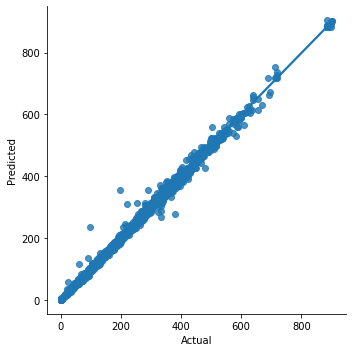

In [232]:
import seaborn as sns
sns.lmplot(x='Actual',y='Predicted',data=actual_vs_pred,fit_reg=True) 

We can easily fit a regression line to actual and predicted values, the model is performing pretty well

## Feature Importance

In [241]:
feature_importances = sorted(zip(np.round(grid_pipeline.best_estimator_.named_steps.xgb_regressor.feature_importances_*100, 3),
                                 food_data[feature_cols[:-1]].columns), reverse=True) 
feature_importances = pd.DataFrame(feature_importances)
feature_importances.columns = ['score','feature']
feature_importances[:50]

,score,feature
0,89.108002,Net-Carbs (g)
1,6.523000,Food Group
2,0.562000,Added Sugar (g)
3,0.325000,Hydroxyproline (mg)
4,0.123000,Fat (g)
5,0.101000,Protein (g)
6,0.082000,"Phosphorus, P (mg)"
7,0.073000,Omega 6s (mg)
8,0.068000,Maltose (g)
9,0.064000,Menaquinone-4 (mcg)
